In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Settings
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}' if abs(x) < 1000 else f'{x:,.0f}')

# Load data
hosts = pd.read_csv('data/raw/hosts.csv')
listings = pd.read_csv('data/raw/listings.csv')
guests = pd.read_csv('data/raw/guests.csv')
bookings = pd.read_csv('data/raw/bookings.csv')
fees = pd.read_csv('data/raw/booking_fees.csv')
costs = pd.read_csv('data/raw/host_costs.csv')

print("All data loaded successfully!")

All data loaded successfully!


In [2]:
print("PHASE 1: Data Quality Check")


PHASE 1: Data Quality Check


In [3]:
# Hosts
print("HOSTS")
print(f"Shape: {hosts.shape}")
print(f"Columns: {hosts.columns.tolist()}")
print(f"Data types:\n{hosts.dtypes}\n")

# Bookings
print("BOOKINGS")
print(f"Shape: {bookings.shape}")
print(f"Null values:\n{bookings.isnull().sum()}\n")

# Dates
print("DATE RANGE")
bookings['booking_date'] = pd.to_datetime(bookings['booking_date'])
bookings['checkin_date'] = pd.to_datetime(bookings['checkin_date'])
bookings['checkout_date'] = pd.to_datetime(bookings['checkout_date'])
print(f"Earliest booking: {bookings['booking_date'].min()}")
print(f"Latest booking: {bookings['booking_date'].max()}")

HOSTS
Shape: (500, 8)
Columns: ['host_id', 'host_name', 'neighborhood', 'host_since_days', 'response_rate', 'number_of_listings', 'avg_review_rating', 'review_count']
Data types:
host_id                   str
host_name                 str
neighborhood              str
host_since_days         int64
response_rate         float64
number_of_listings      int64
avg_review_rating     float64
review_count            int64
dtype: object

BOOKINGS
Shape: (14457, 14)
Null values:
booking_id               0
listing_id               0
host_id                  0
guest_id                 0
booking_date             0
checkin_date             0
checkout_date            0
length_of_stay_nights    0
base_price_per_night     0
total_base_price         0
room_type                0
neighborhood             0
is_cancelled             0
days_until_checkin       0
dtype: int64

DATE RANGE
Earliest booking: 2023-01-01 00:00:00
Latest booking: 2023-12-30 00:00:00


In [4]:
print("PHASE 2: Uniqueness Check")

PHASE 2: Uniqueness Check


In [5]:
print("UNIQUENESS")
print(f"Unique hosts: {hosts['host_id'].nunique()}")
print(f"Unique listings: {listings['listing_id'].nunique()}")
print(f"Unique guests: {guests['guest_id'].nunique()}")
print(f"Unique bookings: {bookings['booking_id'].nunique()}")
print(f"Unique neighborhoods: {hosts['neighborhood'].nunique()}")

UNIQUENESS
Unique hosts: 500
Unique listings: 758
Unique guests: 5000
Unique bookings: 14457
Unique neighborhoods: 8


In [6]:
print("PHASE 2.1: Value Ranges")

PHASE 2.1: Value Ranges


In [8]:
print("VALUE RANGES")
print("\nPrices:")
print(bookings['base_price_per_night'].describe())
print("\nTotal Booking Values:")
print(bookings['total_base_price'].describe())
print("\nLength of Stay:")
print(bookings['length_of_stay_nights'].describe())
print("\nGuest Ratings:")
print(guests['avg_rating_given'].describe())

VALUE RANGES

Prices:
count   14,457
mean    258.24
std     133.60
min      45.02
25%     146.48
50%     229.56
75%     345.76
max     646.24
Name: base_price_per_night, dtype: float64

Total Booking Values:
count   14,457
mean    825.82
std     871.27
min      45.38
25%     292.28
50%     550.07
75%      1,034
max      9,024
Name: total_base_price, dtype: float64

Length of Stay:
count   14,457
mean      3.18
std       2.60
min       1.00
25%       1.00
50%       3.00
75%       4.00
max      14.00
Name: length_of_stay_nights, dtype: float64

Guest Ratings:
count   5,000
mean     4.50
std      0.29
min      4.00
25%      4.24
50%      4.49
75%      4.74
max      5.00
Name: avg_rating_given, dtype: float64


In [9]:
print(" PHASE 3: Hosts Analysis")

 PHASE 3: Hosts Analysis


In [10]:
print("HOST STATISTICS")
print(f"Total hosts: {len(hosts)}")
print(f"Hosts per neighborhood:\n{hosts['neighborhood'].value_counts()}\n")

print("Response Rates")
print(hosts['response_rate'].describe())

print("\nAverage Ratings")
print(hosts['avg_review_rating'].describe())

print("\nListings per Host")
listings_per_host = hosts['number_of_listings'].value_counts().sort_index()
print(listings_per_host)

HOST STATISTICS
Total hosts: 500
Hosts per neighborhood:
neighborhood
Seattle          74
Queens           66
Oakland          66
Brooklyn         61
San Francisco    61
Denver           60
Austin           58
Manhattan        54
Name: count, dtype: int64

Response Rates
count   500.00
mean     87.49
std       7.25
min      75.05
25%      81.04
50%      87.03
75%      93.97
max      99.92
Name: response_rate, dtype: float64

Average Ratings
count   500.00
mean      4.60
std       0.24
min       4.20
25%       4.39
50%       4.62
75%       4.81
max       5.00
Name: avg_review_rating, dtype: float64

Listings per Host
number_of_listings
1    295
2    152
3     53
Name: count, dtype: int64


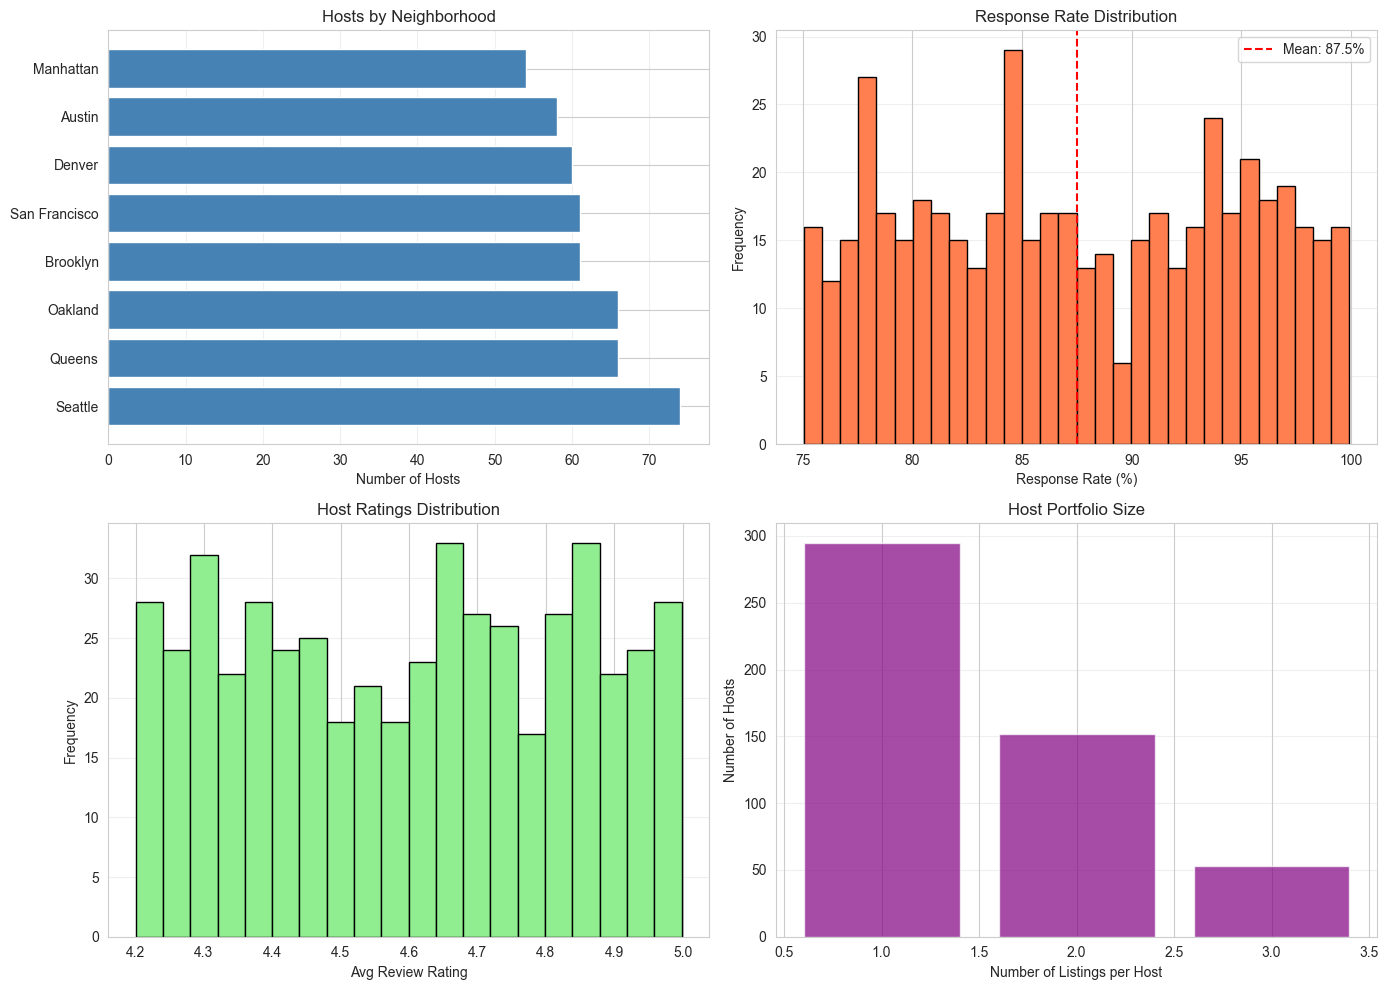

Saved: 01_hosts_analysis.png


In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Hosts by neighborhood
axes[0, 0].barh(hosts['neighborhood'].value_counts().index, 
                hosts['neighborhood'].value_counts().values, color='steelblue')
axes[0, 0].set_xlabel('Number of Hosts')
axes[0, 0].set_title('Hosts by Neighborhood')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Response rate distribution
axes[0, 1].hist(hosts['response_rate'], bins=30, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Response Rate (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Response Rate Distribution')
axes[0, 1].axvline(hosts['response_rate'].mean(), color='red', linestyle='--', label=f"Mean: {hosts['response_rate'].mean():.1f}%")
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Review ratings
axes[1, 0].hist(hosts['avg_review_rating'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Avg Review Rating')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Host Ratings Distribution')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Listings per host
listings_count = hosts['number_of_listings'].value_counts().sort_index()
axes[1, 1].bar(listings_count.index, listings_count.values, color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Number of Listings per Host')
axes[1, 1].set_ylabel('Number of Hosts')
axes[1, 1].set_title('Host Portfolio Size')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/01_hosts_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: 01_hosts_analysis.png")



## PHASE 3: Host Profile Analysis

### Key Insights

* **Seattle has the highest host count**, followed by Queens and Oakland. Manhattan has the lowest among the selected markets.

* **Average response rate is around 87–90%**, with most hosts maintaining high responsiveness.

* **Ratings are consistently high (4.5–4.9 range)**, indicating strong guest satisfaction.

* **Most hosts operate only 1 listing**, with a smaller portion managing 2–3 properties.

**Overall:** The platform is characterized by high service quality and a predominantly small-scale host base.


In [17]:
print("PHASE 4: Listings Analysis ")

PHASE 4: Listings Analysis 


In [14]:
print("LISTINGS OVERVIEW")
print(f"Total listings: {len(listings)}")
print(f"\nRoom Types:")
print(listings['room_type'].value_counts())
print(f"\nProperty Types:")
print(listings['property_type'].value_counts())
print(f"\nPrice per Night Stats:")
print(listings['price_per_night'].describe())

LISTINGS OVERVIEW
Total listings: 758

Room Types:
room_type
Entire home/apt    401
Private room       258
Shared room         99
Name: count, dtype: int64

Property Types:
property_type
House         116
Guesthouse    115
Villa         114
Condo         110
Studio        106
Apartment     101
Loft           96
Name: count, dtype: int64

Price per Night Stats:
count   758.00
mean    225.61
std     108.55
min      52.97
25%     130.72
50%     207.89
75%     298.54
max     461.60
Name: price_per_night, dtype: float64


In [15]:
print("PRICING BY ROOM TYPE")
for room in listings['room_type'].unique():
    room_data = listings[listings['room_type'] == room]
    print(f"\n{room}:")
    print(f"  Count: {len(room_data)}")
    print(f"  Min price: ${room_data['price_per_night'].min():.2f}")
    print(f"  Max price: ${room_data['price_per_night'].max():.2f}")
    print(f"  Avg price: ${room_data['price_per_night'].mean():.2f}")
    print(f"  Median price: ${room_data['price_per_night'].median():.2f}")

PRICING BY ROOM TYPE

Entire home/apt:
  Count: 401
  Min price: $198.58
  Max price: $461.60
  Avg price: $308.80
  Median price: $293.54

Shared room:
  Count: 99
  Min price: $52.97
  Max price: $122.77
  Avg price: $85.83
  Median price: $81.70

Private room:
  Count: 258
  Min price: $99.10
  Max price: $230.35
  Avg price: $149.96
  Median price: $144.69


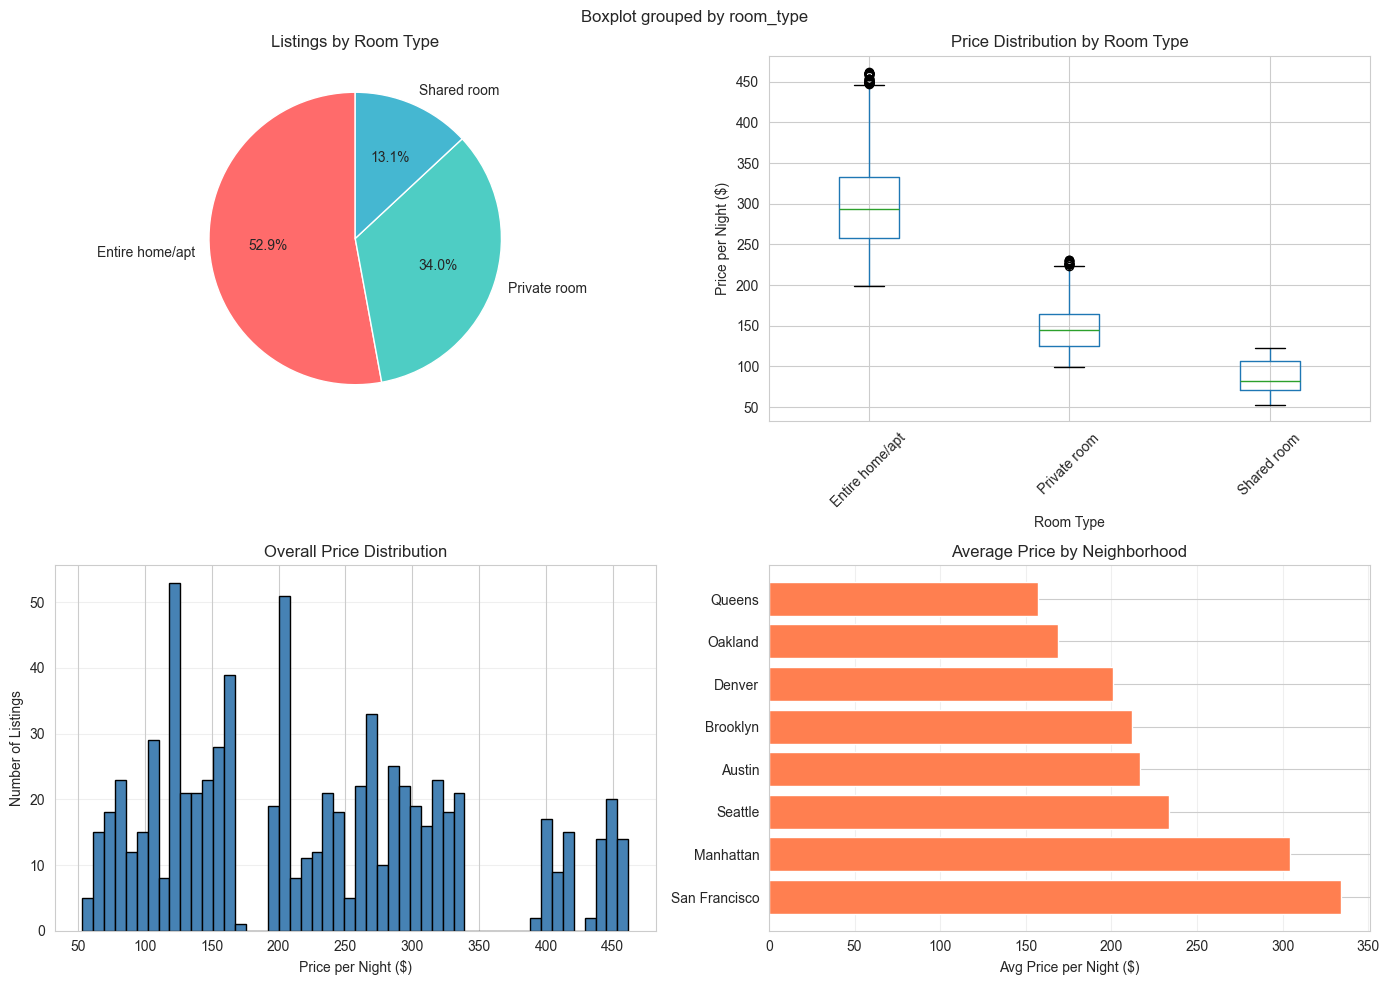

 Saved: 02_listings_analysis.png


In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Room type breakdown
room_counts = listings['room_type'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[0, 0].pie(room_counts.values, labels=room_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Listings by Room Type')

# Plot 2: Prices by room type
listings.boxplot(column='price_per_night', by='room_type', ax=axes[0, 1])
axes[0, 1].set_xlabel('Room Type')
axes[0, 1].set_ylabel('Price per Night ($)')
axes[0, 1].set_title('Price Distribution by Room Type')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Plot 3: Price distribution overall
axes[1, 0].hist(listings['price_per_night'], bins=50, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Price per Night ($)')
axes[1, 0].set_ylabel('Number of Listings')
axes[1, 0].set_title('Overall Price Distribution')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Neighborhood prices
neighborhood_prices = listings.groupby('neighborhood')['price_per_night'].mean().sort_values(ascending=False)
axes[1, 1].barh(neighborhood_prices.index, neighborhood_prices.values, color='coral')
axes[1, 1].set_xlabel('Avg Price per Night ($)')
axes[1, 1].set_title('Average Price by Neighborhood')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/02_listings_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Saved: 02_listings_analysis.png")

## PHASE 4: Listings & Pricing Analysis

### Key Insights

* **Room Type Distribution:**
  Entire homes/apartments account for approximately **53%** of listings, private rooms about **34%**, and shared rooms around **13%**.

* **Highest Average Price by Room Type:**
  **Entire homes/apartments** have the highest average nightly price, significantly above private and shared rooms.

* **Most Expensive Neighborhood:**
  **San Francisco** has the highest average price per night, followed by Manhattan.

**Overall:** Pricing is primarily driven by entire-home listings and premium urban markets, with San Francisco leading in average nightly rates.


In [18]:
print(" PHASE 5: Bookings & Temporal Analysis")

 PHASE 5: Bookings & Temporal Analysis


In [19]:
print("BOOKING OVERVIEW")
print(f"Total bookings: {len(bookings)}")
print(f"\nLength of Stay:")
print(bookings['length_of_stay_nights'].describe())
print(f"\nCancellations:")
print(f"Cancelled: {bookings['is_cancelled'].sum()} ({bookings['is_cancelled'].mean()*100:.1f}%)")
print(f"Completed: {(1-bookings['is_cancelled']).sum()} ({(1-bookings['is_cancelled']).mean()*100:.1f}%)")
print(f"\nBooking Advance (days before checkin):")
print(bookings['days_until_checkin'].describe())

BOOKING OVERVIEW
Total bookings: 14457

Length of Stay:
count   14,457
mean      3.18
std       2.60
min       1.00
25%       1.00
50%       3.00
75%       4.00
max      14.00
Name: length_of_stay_nights, dtype: float64

Cancellations:
Cancelled: 1231 (8.5%)
Completed: 13226 (91.5%)

Booking Advance (days before checkin):
count   14,457
mean     12.81
std      13.33
min       1.00
25%       3.00
50%       9.00
75%      18.00
max     132.00
Name: days_until_checkin, dtype: float64


In [20]:
# Monthly bookings
bookings['month'] = bookings['booking_date'].dt.month
monthly_bookings = bookings.groupby('month').size()

print("BOOKINGS BY MONTH")
for month, count in monthly_bookings.items():
    month_name = pd.Timestamp(year=2023, month=month, day=1).strftime('%B')
    print(f"{month_name}: {count} bookings")

BOOKINGS BY MONTH
January: 1285 bookings
February: 1149 bookings
March: 1278 bookings
April: 1219 bookings
May: 1310 bookings
June: 1244 bookings
July: 1183 bookings
August: 1254 bookings
September: 1223 bookings
October: 1283 bookings
November: 1171 bookings
December: 858 bookings


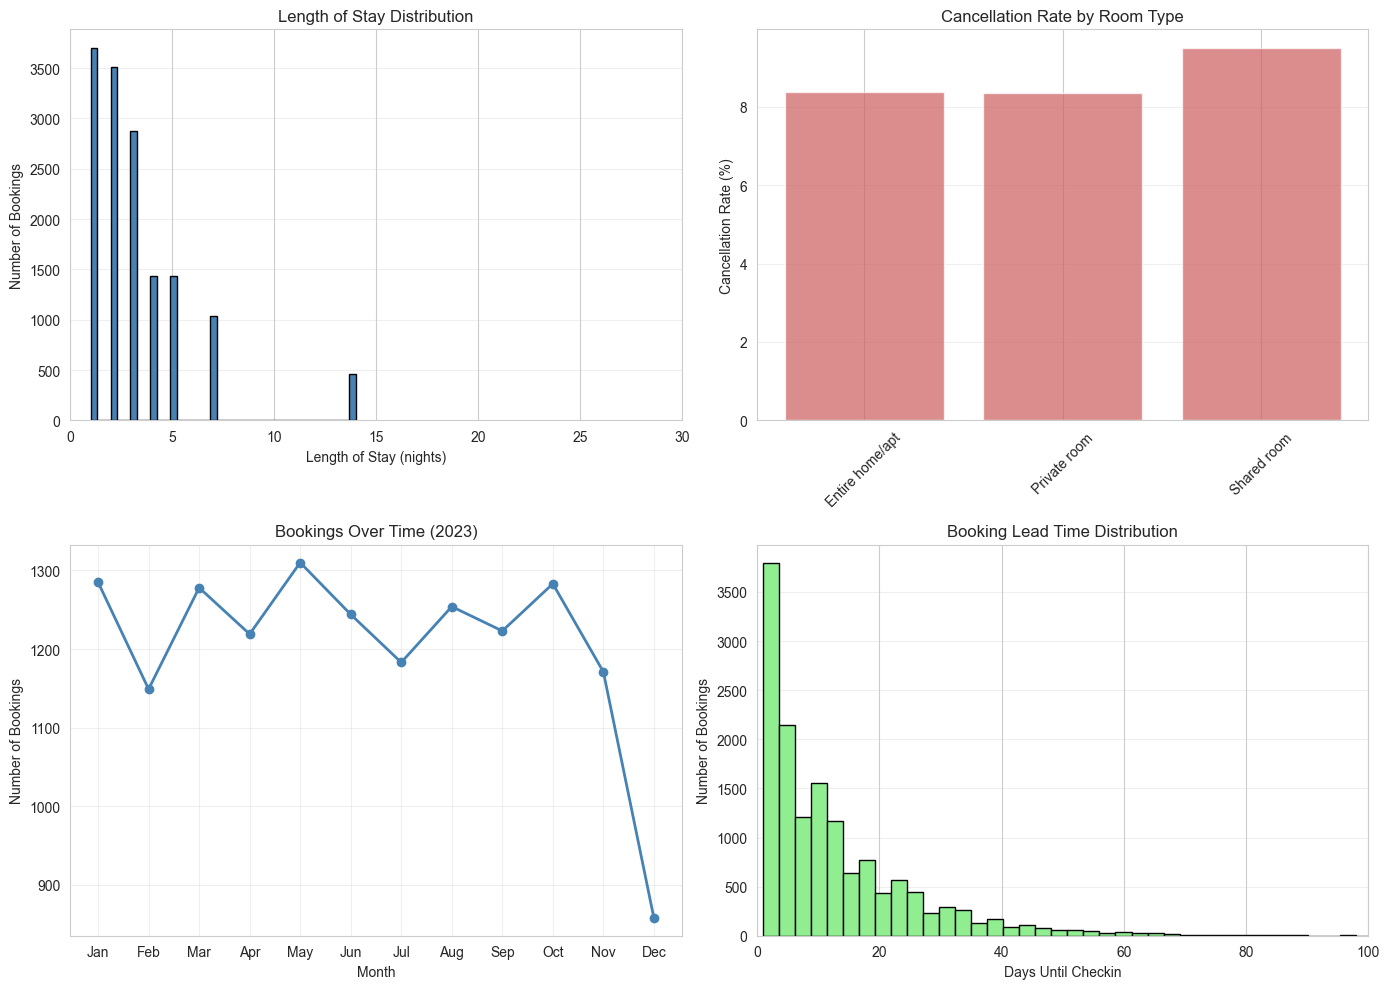

✓ Saved: 03_bookings_temporal.png


In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Length of stay
axes[0, 0].hist(bookings['length_of_stay_nights'], bins=40, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Length of Stay (nights)')
axes[0, 0].set_ylabel('Number of Bookings')
axes[0, 0].set_title('Length of Stay Distribution')
axes[0, 0].set_xlim(0, 30)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Cancellations by room type
cancel_by_room = bookings.groupby('room_type')['is_cancelled'].agg(['sum', 'count'])
cancel_by_room['pct'] = (cancel_by_room['sum'] / cancel_by_room['count'] * 100)
axes[0, 1].bar(cancel_by_room.index, cancel_by_room['pct'], color='indianred', alpha=0.7)
axes[0, 1].set_ylabel('Cancellation Rate (%)')
axes[0, 1].set_title('Cancellation Rate by Room Type')
axes[0, 1].grid(axis='y', alpha=0.3)
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Plot 3: Monthly bookings
monthly_bookings.plot(ax=axes[1, 0], color='steelblue', marker='o', linewidth=2)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Bookings')
axes[1, 0].set_title('Bookings Over Time (2023)')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot 4: Booking advance
axes[1, 1].hist(bookings['days_until_checkin'], bins=50, color='lightgreen', edgecolor='black')
axes[1, 1].set_xlabel('Days Until Checkin')
axes[1, 1].set_ylabel('Number of Bookings')
axes[1, 1].set_title('Booking Lead Time Distribution')
axes[1, 1].set_xlim(0, 100)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/03_bookings_temporal.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 03_bookings_temporal.png")

## PHASE 5: Booking & Temporal Analysis

### Key Insights

* **Length of Stay:**
  Most bookings fall within the **2–5 night range**, with shorter stays dominating overall demand.

* **Cancellation Patterns:**
  Cancellation rates are slightly higher for **shared rooms**, suggesting greater volatility in lower-priced segments.

* **Seasonality:**
  Bookings increase during **late spring and summer months (May–October)**, with peaks around May and October. December shows a noticeable decline.

* **Booking Lead Time:**
  The majority of bookings are made **within 0–20 days before check-in**, indicating strong short-term booking behavior.

**Overall:** Demand is driven by short stays, concentrated in warmer months, with most guests booking relatively close to their check-in date.


In [22]:
print(" PHASE 6: Revenue & Fees Analysis")

 PHASE 6: Revenue & Fees Analysis


In [23]:
# Merge all data
combined = bookings.merge(fees, on='booking_id').merge(costs, on='booking_id')

print("REVENUE OVERVIEW")
print(f"Total Gross Booking Value: ${fees['gross_booking_value'].sum():,.0f}")
print(f"Avg Booking Value: ${fees['gross_booking_value'].mean():.2f}")
print(f"\nFee Breakdown (Totals):")
print(f"Platform Fees: ${(fees['host_platform_fee'] + fees['guest_service_fee']).sum():,.0f}")
print(f"Payment Fees: ${fees['payment_processing_fee'].sum():,.0f}")
print(f"Cleaning Fees: ${fees['cleaning_fee_fixed'].sum():,.0f}")
print(f"Net to Host: ${fees['net_payout_to_host'].sum():,.0f}")
print(f"\nCost Breakdown (Totals):")
print(f"Cleaning Costs: ${costs['cleaning_cost'].sum():,.0f}")
print(f"Supplies Costs: ${costs['supplies_cost'].sum():,.0f}")
print(f"Maintenance: ${costs['maintenance_allocation'].sum():,.0f}")

REVENUE OVERVIEW
Total Gross Booking Value: $13,742,721
Avg Booking Value: $950.59

Fee Breakdown (Totals):
Platform Fees: $2,053,482
Payment Fees: $272,683
Cleaning Fees: $433,710
Net to Host: $13,111,873

Cost Breakdown (Totals):
Cleaning Costs: $1,790,825
Supplies Costs: $596,945
Maintenance: $173,484


In [24]:
# Calculate waterfall
gbv = fees['gross_booking_value'].sum()
platform_fees = (fees['host_platform_fee'] + fees['guest_service_fee']).sum()
payment_fees = fees['payment_processing_fee'].sum()
net_payout = fees['net_payout_to_host'].sum()
host_costs = costs['total_host_costs'].sum()
net_margin = net_payout - host_costs

print("REVENUE WATERFALL (All Bookings)")
print("="*50)
print(f"Gross Booking Value:     ${gbv:>15,.0f}  (100.0%)")
print(f"- Platform Fees:         ${platform_fees:>15,.0f}  ({platform_fees/gbv*100:>5.1f}%)")
print(f"- Payment Fees:          ${payment_fees:>15,.0f}  ({payment_fees/gbv*100:>5.1f}%)")
print(f"= Net to Host:           ${net_payout:>15,.0f}  ({net_payout/gbv*100:>5.1f}%)")
print(f"- Host Costs:            ${host_costs:>15,.0f}  ({host_costs/gbv*100:>5.1f}%)")
print(f"= Net Margin:            ${net_margin:>15,.0f}  ({net_margin/gbv*100:>5.1f}%)")
print("="*50)

REVENUE WATERFALL (All Bookings)
Gross Booking Value:     $     13,742,721  (100.0%)
- Platform Fees:         $      2,053,482  ( 14.9%)
- Payment Fees:          $        272,683  (  2.0%)
= Net to Host:           $     13,111,873  ( 95.4%)
- Host Costs:            $      2,561,255  ( 18.6%)
= Net Margin:            $     10,550,618  ( 76.8%)


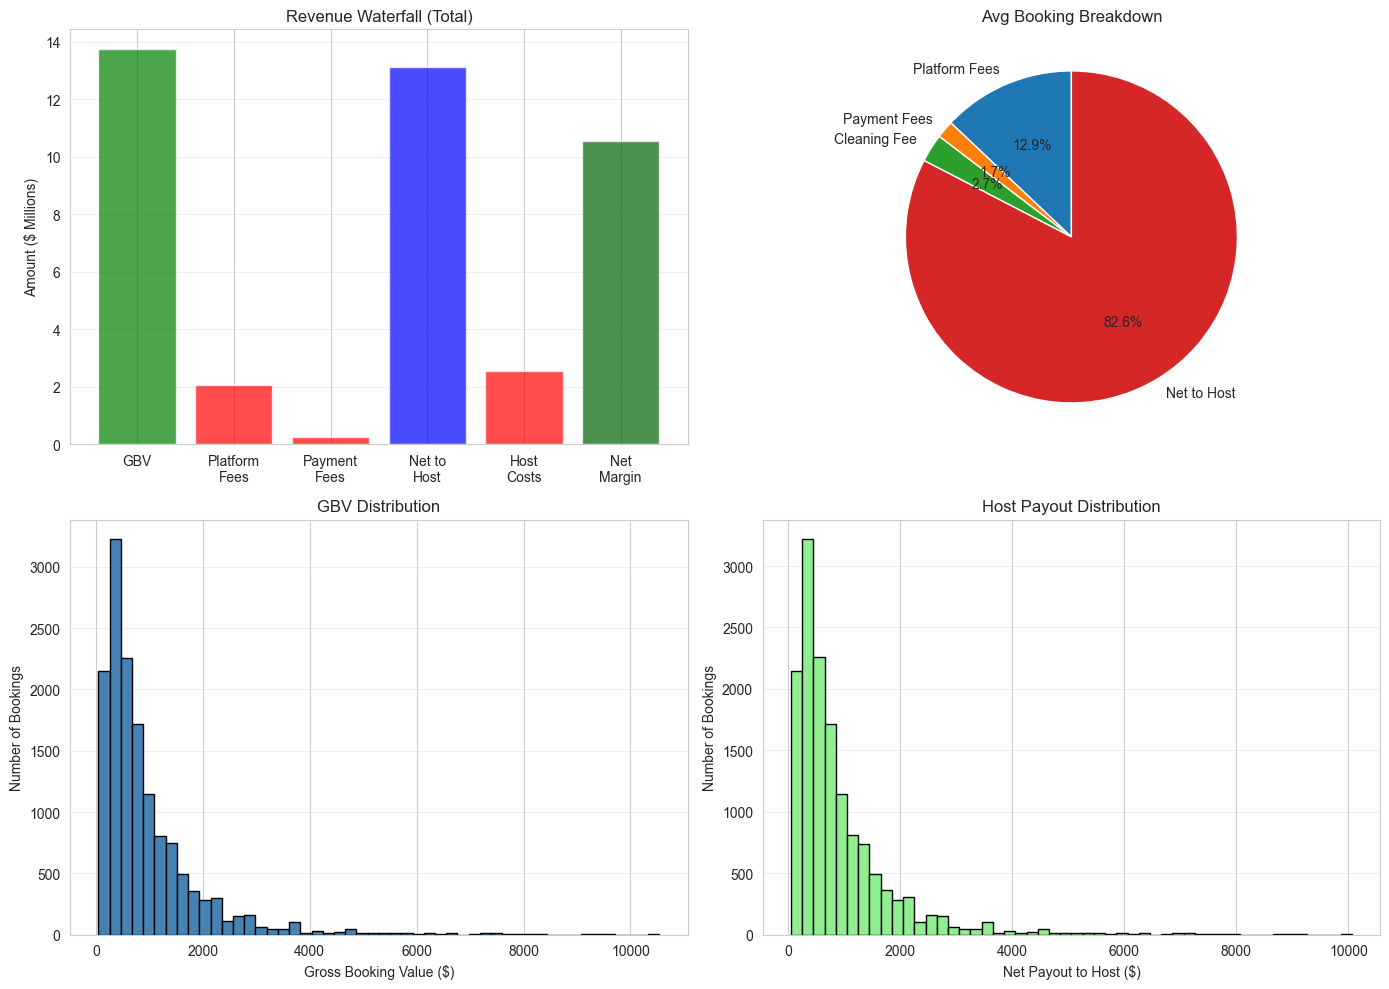

✓ Saved: 04_revenue_analysis.png


In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Revenue waterfall
categories = ['GBV', 'Platform\nFees', 'Payment\nFees', 'Net to\nHost', 'Host\nCosts', 'Net\nMargin']
amounts = [gbv/1e6, -platform_fees/1e6, -payment_fees/1e6, net_payout/1e6, -host_costs/1e6, net_margin/1e6]
colors = ['green', 'red', 'red', 'blue', 'red', 'darkgreen']

axes[0, 0].bar(categories, [abs(a) for a in amounts], color=colors, alpha=0.7)
axes[0, 0].set_ylabel('Amount ($ Millions)')
axes[0, 0].set_title('Revenue Waterfall (Total)')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Avg booking breakdown (pie)
avg_costs = {
    'Platform Fees': (fees['host_platform_fee'] + fees['guest_service_fee']).mean(),
    'Payment Fees': fees['payment_processing_fee'].mean(),
    'Cleaning Fee': fees['cleaning_fee_fixed'].mean(),
    'Net to Host': fees['net_payout_to_host'].mean(),
}
axes[0, 1].pie(avg_costs.values(), labels=avg_costs.keys(), autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Avg Booking Breakdown')

# Plot 3: Gross booking value distribution
axes[1, 0].hist(fees['gross_booking_value'], bins=50, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Gross Booking Value ($)')
axes[1, 0].set_ylabel('Number of Bookings')
axes[1, 0].set_title('GBV Distribution')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Net payout distribution
axes[1, 1].hist(fees['net_payout_to_host'], bins=50, color='lightgreen', edgecolor='black')
axes[1, 1].set_xlabel('Net Payout to Host ($)')
axes[1, 1].set_ylabel('Number of Bookings')
axes[1, 1].set_title('Host Payout Distribution')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/04_revenue_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 04_revenue_analysis.png")

## PHASE 5: Revenue & Margin Analysis

### Key Insights

* **Revenue Structure:**
  Total Gross Booking Value (GBV) is significantly reduced by platform fees and host costs, resulting in a lower net margin.

* **Booking Breakdown:**
  On average, approximately **83% of booking value goes to the host**, around **13% to platform fees**, and a small portion to payment and cleaning fees.

* **Net Margin:**
  After accounting for host costs, overall net margin remains positive but materially lower than net payout to host.

* **Distribution Patterns:**
  Both GBV and host payouts are right-skewed, with most bookings concentrated in lower value ranges and a small number of high-value outliers.

**Overall:** Revenue is volume-driven, with margin dependent on controlling platform fees and host operating costs while managing high-value booking concentration.**


In [26]:
# Calculate net margins
combined['net_margin'] = combined['net_payout_to_host'] - combined['total_host_costs']
combined['margin_pct'] = (combined['net_margin'] / combined['gross_booking_value'] * 100)

print("PROFITABILITY ANALYSIS")
print(f"Avg Net Margin: ${combined['net_margin'].mean():.2f}")
print(f"Avg Margin %: {combined['margin_pct'].mean():.1f}%")
print(f"\nProfitable vs Loss-making:")
profitable = (combined['net_margin'] > 0).sum()
loss = (combined['net_margin'] < 0).sum()
print(f"Profitable: {profitable:,} ({profitable/len(combined)*100:.1f}%)")
print(f"Loss-making: {loss:,} ({loss/len(combined)*100:.1f}%)")

PROFITABILITY ANALYSIS
Avg Net Margin: $729.79
Avg Margin %: 75.2%

Profitable vs Loss-making:
Profitable: 14,457 (100.0%)
Loss-making: 0 (0.0%)


In [27]:
print("MARGIN BY ROOM TYPE")
by_room = combined.groupby('room_type').agg({
    'booking_id': 'count',
    'gross_booking_value': 'mean',
    'net_margin': 'mean',
    'margin_pct': 'mean',
}).round(2)
by_room.columns = ['Count', 'Avg GBV', 'Avg Margin $', 'Avg Margin %']
print(by_room)

MARGIN BY ROOM TYPE
                 Count  Avg GBV  Avg Margin $  Avg Margin %
room_type                                                  
Entire home/apt   7590    1,293        994.86         75.73
Private room      4982   648.31        495.77         75.04
Shared room       1885   370.80        281.01         73.85


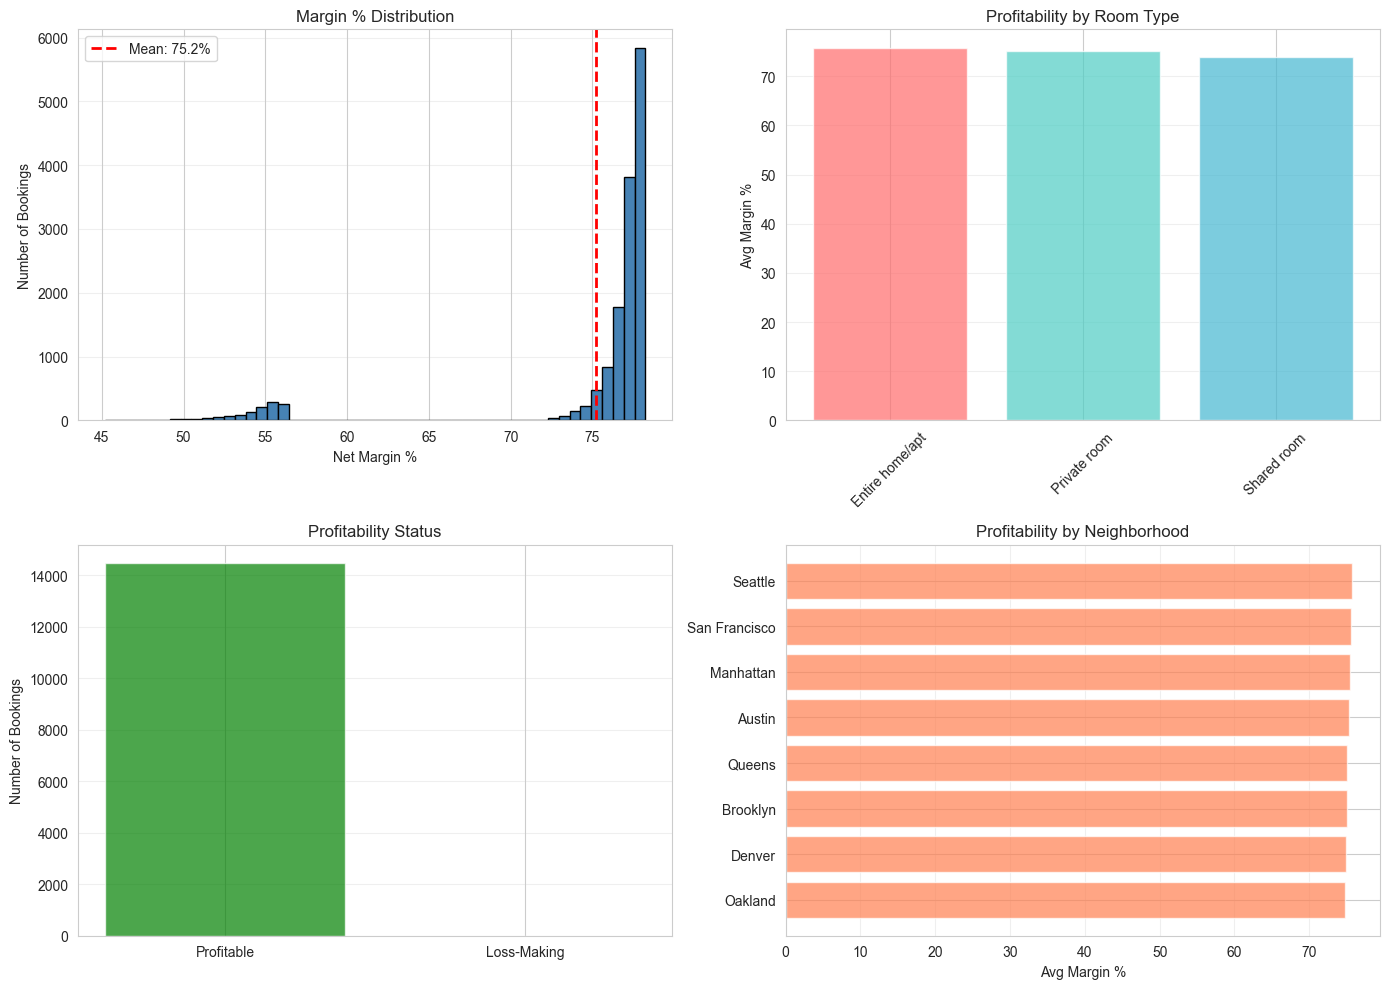

✓ Saved: 05_profitability_analysis.png


In [28]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Margin distribution
axes[0, 0].hist(combined['margin_pct'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].axvline(combined['margin_pct'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {combined['margin_pct'].mean():.1f}%")
axes[0, 0].set_xlabel('Net Margin %')
axes[0, 0].set_ylabel('Number of Bookings')
axes[0, 0].set_title('Margin % Distribution')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Margin by room type
room_margins = combined.groupby('room_type')['margin_pct'].mean()
axes[0, 1].bar(room_margins.index, room_margins.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.7)
axes[0, 1].set_ylabel('Avg Margin %')
axes[0, 1].set_title('Profitability by Room Type')
axes[0, 1].grid(axis='y', alpha=0.3)
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Plot 3: Profitable vs Loss-making
status_counts = [profitable, loss]
axes[1, 0].bar(['Profitable', 'Loss-Making'], status_counts, color=['green', 'red'], alpha=0.7)
axes[1, 0].set_ylabel('Number of Bookings')
axes[1, 0].set_title('Profitability Status')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Margin by neighborhood
neighborhood_margins = combined.groupby('neighborhood')['margin_pct'].mean().sort_values()
axes[1, 1].barh(neighborhood_margins.index, neighborhood_margins.values, color='coral', alpha=0.7)
axes[1, 1].set_xlabel('Avg Margin %')
axes[1, 1].set_title('Profitability by Neighborhood')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/05_profitability_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 05_profitability_analysis.png")

## PHASE 7: Profitability Analysis

### Key Insights

* **Average Net Margin:** Around **75%**, with most bookings clustered near this level.

* **By Room Type:** Margin percentages are similar across room types, with entire homes slightly higher.

* **Profitability Status:** Nearly all bookings are profitable; loss-making cases are minimal.

* **By Neighborhood:** Margins are relatively consistent across cities, with Seattle and San Francisco slightly higher.

**Overall:** Profitability is stable across segments, with limited variation by room type or location.


In [29]:
print("PHASE 8: Key Insights Summary")

PHASE 8: Key Insights Summary


In [31]:
print("KEY INSIGHTS FROM EDA")

print(f"\n1. DATA VOLUME")
print(f"   - Hosts: {len(hosts)}")
print(f"   - Listings: {len(listings)}")
print(f"   - Guests: {len(guests)}")
print(f"   - Bookings: {len(bookings)}")

print(f"\n2. REVENUE METRICS")
print(f"   - Total GBV: ${gbv:,.0f}")
print(f"   - Avg Booking Value: ${fees['gross_booking_value'].mean():.0f}")
print(f"   - Platform keeps: {(platform_fees+payment_fees)/gbv*100:.1f}% of GBV")

print(f"\n3. HOST PAYOUTS")
print(f"   - Avg Net Payout: ${fees['net_payout_to_host'].mean():.0f}")
print(f"   - Total Host Costs: ${host_costs:,.0f}")
print(f"   - Cost per Booking: ${costs['total_host_costs'].mean():.0f}")

print(f"\n4. PROFITABILITY")
print(f"   - Avg Net Margin: ${combined['net_margin'].mean():.0f} ({combined['margin_pct'].mean():.1f}%)")
print(f"   - % Profitable Bookings: {profitable/len(combined)*100:.1f}%")
print(f"   - Best Room Type: {combined.groupby('room_type')['margin_pct'].mean().idxmax()}")
print(f"   - Best Neighborhood: {combined.groupby('neighborhood')['margin_pct'].mean().idxmax()}")

print(f"\n5. BOOKING PATTERNS")
print(f"   - Avg Length of Stay: {combined['length_of_stay_nights'].mean():.1f} nights")
print(f"   - Cancellation Rate: {combined['is_cancelled'].mean()*100:.1f}%")
print(f"   - Avg Booking Advance: {combined['days_until_checkin'].mean():.1f} days")

print(f"\n6. SEASONAL PATTERNS")
print(f"   - Peak Month: {monthly_bookings.idxmax()} ({monthly_bookings.max()} bookings)")
print(f"   - Low Month: {monthly_bookings.idxmin()} ({monthly_bookings.min()} bookings)")


KEY INSIGHTS FROM EDA

1. DATA VOLUME
   - Hosts: 500
   - Listings: 758
   - Guests: 5000
   - Bookings: 14457

2. REVENUE METRICS
   - Total GBV: $13,742,721
   - Avg Booking Value: $951
   - Platform keeps: 16.9% of GBV

3. HOST PAYOUTS
   - Avg Net Payout: $907
   - Total Host Costs: $2,561,255
   - Cost per Booking: $177

4. PROFITABILITY
   - Avg Net Margin: $730 (75.2%)
   - % Profitable Bookings: 100.0%
   - Best Room Type: Entire home/apt
   - Best Neighborhood: Seattle

5. BOOKING PATTERNS
   - Avg Length of Stay: 3.2 nights
   - Cancellation Rate: 8.5%
   - Avg Booking Advance: 12.8 days

6. SEASONAL PATTERNS
   - Peak Month: 5 (1310 bookings)
   - Low Month: 12 (858 bookings)
